In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
epl_15_16_matches = pd.read_csv('england-premier-league-matches-2015-to-2016-stats.csv')
epl_16_17_matches = pd.read_csv('england-premier-league-matches-2016-to-2017-stats.csv')
epl_17_18_matches = pd.read_csv('england-premier-league-matches-2017-to-2018-stats.csv')
epl_18_19_matches = pd.read_csv('england-premier-league-matches-2018-to-2019-stats.csv')
epl_19_20_matches = pd.read_csv('england-premier-league-matches-2019-to-2020-stats.csv')

In [3]:
epl_15_20_matches = pd.concat([epl_15_16_matches, epl_16_17_matches, 
                               epl_17_18_matches,epl_18_19_matches, epl_19_20_matches], axis=0)

In [4]:
epl_15_20_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 379
Data columns (total 64 columns):
timestamp                              1900 non-null int64
date_GMT                               1900 non-null object
status                                 1900 non-null object
attendance                             1868 non-null float64
home_team_name                         1900 non-null object
away_team_name                         1900 non-null object
referee                                1165 non-null object
Game Week                              1900 non-null int64
Pre-Match PPG (Home)                   1900 non-null float64
Pre-Match PPG (Away)                   1900 non-null float64
home_ppg                               1900 non-null float64
away_ppg                               1900 non-null float64
home_team_goal_count                   1900 non-null int64
away_team_goal_count                   1900 non-null int64
total_goal_count                       1900 non-null 

In [5]:
epl_15_16_teams = pd.read_csv('england-premier-league-teams-2015-to-2016-stats.csv')
epl_16_17_teams = pd.read_csv('england-premier-league-teams-2016-to-2017-stats.csv')
epl_17_18_teams = pd.read_csv('england-premier-league-teams-2017-to-2018-stats.csv')
epl_18_19_teams = pd.read_csv('england-premier-league-teams-2018-to-2019-stats.csv')
epl_19_20_teams = pd.read_csv('england-premier-league-teams-2019-to-2020-stats.csv')

In [6]:
epl_15_20_teams = pd.concat([epl_15_16_teams, epl_16_17_teams, 
                               epl_17_18_teams,epl_18_19_teams, epl_19_20_teams], axis=0)

In [7]:
epl_15_20_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Columns: 293 entries, team_name to over145_corners_percentage
dtypes: float64(36), int64(253), object(4)
memory usage: 229.7+ KB


In [8]:
epl_15_16_teams2 = pd.read_csv('england-premier-league-teams2-2015-to-2016-stats.csv')
epl_16_17_teams2 = pd.read_csv('england-premier-league-teams2-2016-to-2017-stats.csv')
epl_17_18_teams2 = pd.read_csv('england-premier-league-teams2-2017-to-2018-stats.csv')
epl_18_19_teams2 = pd.read_csv('england-premier-league-teams2-2018-to-2019-stats.csv')
epl_19_20_teams2 = pd.read_csv('england-premier-league-teams2-2019-to-2020-stats.csv')

In [9]:
epl_15_20_teams2 = pd.concat([epl_15_16_teams2, epl_16_17_teams2, 
                               epl_17_18_teams2,epl_18_19_teams2, epl_19_20_teams2], axis=0)

In [10]:
epl_15_20_teams2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Columns: 442 entries, team_name to failed_to_score_2h_away
dtypes: float64(42), int64(396), object(4)
memory usage: 346.1+ KB


In [11]:
epl_15_20_matches[['Game Week','home_team_name','away_team_name','Pre-Match PPG (Home)','Pre-Match PPG (Away)']].head(5)

,Game Week,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away)
0,1,Manchester United,Tottenham Hotspur,0.0,0.0
1,1,AFC Bournemouth,Aston Villa,0.0,0.0
2,1,Norwich City,Crystal Palace,0.0,0.0
3,1,Leicester City,Sunderland,0.0,0.0
4,1,Everton,Watford,0.0,0.0


In [12]:
epl_15_20_matches.reset_index(drop=True, inplace=True)

In [13]:
conditions = [
    (epl_15_20_matches['home_team_goal_count'] == epl_15_20_matches['away_team_goal_count']),
    (epl_15_20_matches['home_team_goal_count'] > epl_15_20_matches['away_team_goal_count']),
    (epl_15_20_matches['home_team_goal_count'] < epl_15_20_matches['away_team_goal_count'])
]

# create a list of the values we want to assign for each condition
values = ['D', 'H', 'A']
values2 = [0, 1, -1]

# create a 2 new columns for match results,
# numerical coulumn (0 => Draw, 1 => Home Win, -1 => Home Lose)
# text column (H => Home, D => Draw, A => Away)
epl_15_20_matches['match_result_txt'] = np.select(conditions, values)
epl_15_20_matches['match_result'] = np.select(conditions, values2)

epl_15_20_matches[['home_team_goal_count','away_team_goal_count','match_result']].head()

,home_team_goal_count,away_team_goal_count,match_result
0,1,0,1
1,0,1,-1
2,1,3,-1
3,4,2,1
4,2,2,0


Text(0.5, 1.0, 'Match Result')

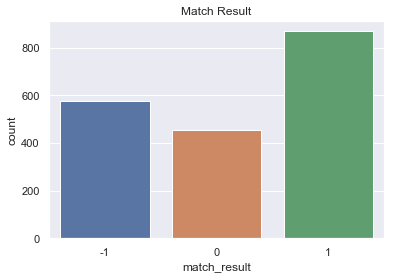

In [14]:
# A count plot to show that macthes mostly result with home wins
sns.set_theme(style="darkgrid")
sns.countplot(x="match_result", data=epl_15_20_matches)
plt.title('Match Result')

In [15]:
# Extract year and month from kick off time => to generate season column
epl_15_20_matches['year'] = pd.DatetimeIndex(epl_15_20_matches['date_GMT']).year
epl_15_20_matches['month'] = pd.DatetimeIndex(epl_15_20_matches['date_GMT']).month

In [16]:
# Adding new columns to generate the corresponding seasons for each match
epl_15_20_matches['year_add'] = epl_15_20_matches['year'] + 1
epl_15_20_matches['year_minus'] = epl_15_20_matches['year'] - 1
epl_15_20_matches['slash'] = '/'
epl_15_20_matches['season_add'] = epl_15_20_matches['year'].astype(str) + epl_15_20_matches['slash'] +  epl_15_20_matches['year_add'].astype(str)
epl_15_20_matches['season_minus'] = epl_15_20_matches['year_minus'].astype(str) + epl_15_20_matches['slash'] +  epl_15_20_matches['year'].astype(str)

In [17]:
# Creating season based on the date of the match
epl_15_20_matches['season'] = np.where(epl_15_20_matches['month'] >= 8, 
                                       epl_15_20_matches['season_add'],
                                       epl_15_20_matches['season_minus'])

In [18]:
# Dropping the columns used for generating the season column
epl_15_20_matches.drop(['year_add','year_minus','slash','season_add','season_minus'], axis=1, inplace=True)

In [19]:
epl_15_20_matches[['year','month','season']].head()

,year,month,season
0,2015,8,2015/2016
1,2015,8,2015/2016
2,2015,8,2015/2016
3,2015,8,2015/2016
4,2015,8,2015/2016


In [20]:
# This part is to generate a column for the matches played for each team before the match
# On previous seasons there is no possibilty for the rows to have different value 
# This method is used to generate this column for future matches as there is a posibility that teams facing each other 
# may differ in their matches played

epl_15_20_matches_played_home = epl_15_20_matches[['season','Game Week','home_team_name']]
epl_15_20_matches_played_away = epl_15_20_matches[['season','Game Week','away_team_name']]

epl_15_20_matches_played_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_matches_played_away.rename(columns={"away_team_name": "team_name"}, inplace = True)

epl_15_20_matches_played_total = pd.concat([epl_15_20_matches_played_home, epl_15_20_matches_played_away], axis=0)
epl_15_20_matches_played_total = epl_15_20_matches_played_total.sort_values(by=['season','team_name','Game Week'])

# MPBM (Matches Played Before Match)
epl_15_20_matches_played_total['MPBM'] = epl_15_20_matches_played_total.groupby(['season','team_name']).cumcount()

epl_15_20_matches_played_total.head(5)

c:\program files\python36\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,season,Game Week,team_name,MPBM
1,2015/2016,1,AFC Bournemouth,0
19,2015/2016,2,AFC Bournemouth,1
22,2015/2016,3,AFC Bournemouth,2
32,2015/2016,4,AFC Bournemouth,3
41,2015/2016,5,AFC Bournemouth,4


In [21]:
# For the method of calculating the matches played for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the MPBM for home and away teams
epl_15_20_matches_home = epl_15_20_matches.merge(epl_15_20_matches_played_total,
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_matches_home.rename(columns={"MPBM": "MPBM_H"}, inplace = True)
epl_15_20_matches_home = epl_15_20_matches_home[['season','Game Week','home_team_name','MPBM_H']]

epl_15_20_matches_away = epl_15_20_matches.merge(epl_15_20_matches_played_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_matches_away.rename(columns={"MPBM": "MPBM_A"}, inplace = True)
epl_15_20_matches_away = epl_15_20_matches_away[['season','Game Week','away_team_name','MPBM_A']]

epl_15_20_matches_home_join = epl_15_20_matches.merge(epl_15_20_matches_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_matches_home_join = epl_15_20_matches_home_join.merge(epl_15_20_matches_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_matches_home_join
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','MPBM_H','MPBM_A']].head(20)

,season,Game Week,home_team_name,away_team_name,MPBM_H,MPBM_A
0,2015/2016,1,Manchester United,Tottenham Hotspur,0,0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0,0
2,2015/2016,1,Norwich City,Crystal Palace,0,0
3,2015/2016,1,Leicester City,Sunderland,0,0
4,2015/2016,1,Everton,Watford,0,0
5,2015/2016,1,Chelsea,Swansea City,0,0
6,2015/2016,1,Newcastle United,Southampton,0,0
7,2015/2016,1,Arsenal,West Ham United,0,0
8,2015/2016,1,Stoke City,Liverpool,0,0
9,2015/2016,1,West Bromwich Albion,Manchester City,0,0


In [22]:
# Here is to show that the current datasets already has no row showing difference in matches between the home and away teams
epl_15_20_matches[epl_15_20_matches.MPBM_H != epl_15_20_matches.MPBM_A].head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_btts_yes,odds_btts_no,stadium_name,match_result_txt,match_result,year,month,season,MPBM_H,MPBM_A


In [23]:
# There is no column for the current points of each team before the match
# There is a column for the average points collected from matches played
# We will use our newly created columns to multiply the average points to retrievw the actual points for each team
# A column will be generated as points difference between each team having the home - away points
# This is our first main feature for the prediction model
epl_15_20_matches['PBM_H'] = epl_15_20_matches['Pre-Match PPG (Home)'] * epl_15_20_matches['MPBM_H']
epl_15_20_matches['PBM_A'] = epl_15_20_matches['Pre-Match PPG (Away)'] * epl_15_20_matches['MPBM_A']

epl_15_20_matches['points_diff'] = epl_15_20_matches['PBM_H'] - epl_15_20_matches['PBM_A']
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','match_result','MPBM_H','Pre-Match PPG (Home)','PBM_H','MPBM_A','Pre-Match PPG (Away)','PBM_A','points_diff']].head(5)

,season,Game Week,home_team_name,away_team_name,match_result,MPBM_H,Pre-Match PPG (Home),PBM_H,MPBM_A,Pre-Match PPG (Away),PBM_A,points_diff
0,2015/2016,1,Manchester United,Tottenham Hotspur,1,0,0.0,0.0,0,0.0,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,-1,0,0.0,0.0,0,0.0,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,-1,0,0.0,0.0,0,0.0,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,1,0,0.0,0.0,0,0.0,0.0,0.0
4,2015/2016,1,Everton,Watford,0,0,0.0,0.0,0,0.0,0.0,0.0


In [24]:
# A similar method will be used to calculate the goals difference for each team.
# Again there is no column indicating the the goals for and the goals against for each team 
# We will calculate those columns and will get the goal difference for each team before playing the match
epl_15_20_matches_goals_home = epl_15_20_matches[['season','Game Week','home_team_name','home_team_goal_count','away_team_goal_count']]
epl_15_20_matches_goals_away = epl_15_20_matches[['season','Game Week','away_team_name','away_team_goal_count','home_team_goal_count']]

epl_15_20_matches_goals_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_matches_goals_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_matches_goals_home.rename(columns={"home_team_goal_count": "team_goals_for"}, inplace = True)
epl_15_20_matches_goals_away.rename(columns={"away_team_goal_count": "team_goals_for"}, inplace = True)
epl_15_20_matches_goals_home.rename(columns={"away_team_goal_count": "team_goals_against"}, inplace = True)
epl_15_20_matches_goals_away.rename(columns={"home_team_goal_count": "team_goals_against"}, inplace = True)

epl_15_20_matches_goals_total = pd.concat([epl_15_20_matches_goals_home, epl_15_20_matches_goals_away], axis=0)
epl_15_20_matches_goals_total = epl_15_20_matches_goals_total.sort_values(by=['season','team_name','Game Week'])

# GSBM_FR (Goals Scored Before Match For) | GSBM_AG (Goals Scored Before Match Against)
epl_15_20_matches_goals_total[['GSBM_D','GSBM_FR','GSBM_AG']] = epl_15_20_matches_goals_total.groupby(['season','team_name']).transform(lambda x: x.shift().fillna(0).cumsum())
epl_15_20_matches_goals_total.drop('GSBM_D', axis=1, inplace=True)

epl_15_20_matches_goals_total.head(5)

,season,Game Week,team_name,team_goals_for,team_goals_against,GSBM_FR,GSBM_AG
1,2015/2016,1,AFC Bournemouth,0,1,0.0,0.0
19,2015/2016,2,AFC Bournemouth,0,1,0.0,1.0
22,2015/2016,3,AFC Bournemouth,4,3,0.0,2.0
32,2015/2016,4,AFC Bournemouth,1,1,4.0,5.0
41,2015/2016,5,AFC Bournemouth,1,3,5.0,6.0


In [25]:
# For the method of calculating the goals for and against for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the GSBM_FR, GSBM_AG for home and away teams
epl_15_20_goals_home = epl_15_20_matches.merge(epl_15_20_matches_goals_total, 
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_goals_home.rename(columns={"GSBM_FR": "GSBM_H_FR"}, inplace = True)
epl_15_20_goals_home.rename(columns={"GSBM_AG": "GSBM_H_AG"}, inplace = True)

epl_15_20_goals_home = epl_15_20_goals_home[['season','Game Week','home_team_name','GSBM_H_FR','GSBM_H_AG']]

epl_15_20_goals_away = epl_15_20_matches.merge(epl_15_20_matches_goals_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_goals_away.rename(columns={"GSBM_FR": "GSBM_A_FR"}, inplace = True)
epl_15_20_goals_away.rename(columns={"GSBM_AG": "GSBM_A_AG"}, inplace = True)
epl_15_20_goals_away = epl_15_20_goals_away[['season','Game Week','away_team_name','GSBM_A_FR','GSBM_A_AG']]

epl_15_20_goals_home_join = epl_15_20_matches.merge(epl_15_20_goals_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_goals_home_join = epl_15_20_goals_home_join.merge(epl_15_20_goals_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_goals_home_join
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','GSBM_H_FR','GSBM_H_AG','GSBM_A_FR','GSBM_A_AG']].head(5)

,season,Game Week,home_team_name,away_team_name,GSBM_H_FR,GSBM_H_AG,GSBM_A_FR,GSBM_A_AG
0,2015/2016,1,Manchester United,Tottenham Hotspur,0.0,0.0,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0.0,0.0,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,0.0,0.0,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,0.0,0.0,0.0,0.0
4,2015/2016,1,Everton,Watford,0.0,0.0,0.0,0.0


In [26]:
# GDBM (Goals Difference Before Match)
epl_15_20_matches['GDBM_H'] = epl_15_20_matches['GSBM_H_FR'] - epl_15_20_matches['GSBM_H_AG']
epl_15_20_matches['GDBM_A'] = epl_15_20_matches['GSBM_A_FR'] - epl_15_20_matches['GSBM_A_AG']

# Goals difference between both home and away teams' goal difference
epl_15_20_matches['goals_diff'] = epl_15_20_matches['GDBM_H'] - epl_15_20_matches['GDBM_A']

In [27]:
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','match_result','MPBM_H','Pre-Match PPG (Home)','PBM_H','MPBM_A','Pre-Match PPG (Away)','PBM_A','points_diff','goals_diff']].head(5)

,season,Game Week,home_team_name,away_team_name,match_result,MPBM_H,Pre-Match PPG (Home),PBM_H,MPBM_A,Pre-Match PPG (Away),PBM_A,points_diff,goals_diff
0,2015/2016,1,Manchester United,Tottenham Hotspur,1,0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,-1,0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,-1,0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,1,0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,2015/2016,1,Everton,Watford,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0


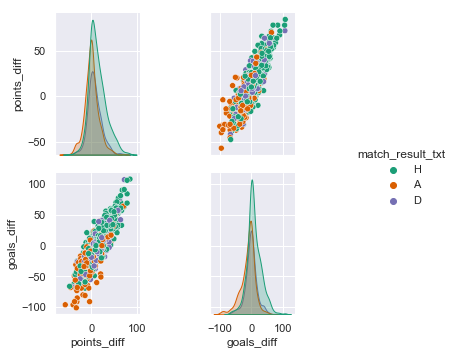

In [28]:
# Here are the top features that will be used in the prediction model
top_features = ['points_diff','goals_diff','match_result_txt']
epl_15_20_matches_top_features = epl_15_20_matches[top_features]
#epl_15_20_matches_top_features.head()
sns.pairplot(epl_15_20_matches_top_features, hue='match_result_txt', palette='Dark2')

In [29]:
X = epl_15_20_matches_top_features.drop('match_result_txt',axis=1)
y = epl_15_20_matches_top_features['match_result_txt']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier()

In [34]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
base_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [37]:
base_pred

array(['H', 'D', 'H', 'D', 'H', 'A', 'H', 'A', 'A', 'D', 'D', 'A', 'H',
       'A', 'D', 'H', 'D', 'A', 'D', 'D', 'H', 'D', 'D', 'A', 'H', 'A',
       'H', 'H', 'A', 'H', 'A', 'D', 'A', 'A', 'H', 'D', 'D', 'H', 'D',
       'H', 'H', 'D', 'H', 'H', 'H', 'D', 'D', 'H', 'A', 'H', 'A', 'A',
       'A', 'H', 'A', 'A', 'A', 'D', 'A', 'A', 'D', 'H', 'H', 'A', 'D',
       'D', 'H', 'A', 'D', 'A', 'H', 'D', 'A', 'H', 'D', 'H', 'H', 'H',
       'D', 'A', 'D', 'H', 'H', 'H', 'H', 'H', 'H', 'A', 'D', 'A', 'A',
       'H', 'A', 'D', 'A', 'H', 'H', 'D', 'A', 'A', 'A', 'H', 'H', 'A',
       'H', 'A', 'H', 'D', 'H', 'H', 'A', 'D', 'H', 'A', 'H', 'H', 'H',
       'H', 'D', 'D', 'H', 'H', 'A', 'A', 'A', 'H', 'A', 'H', 'D', 'H',
       'D', 'H', 'D', 'H', 'H', 'A', 'A', 'A', 'H', 'H', 'A', 'D', 'H',
       'A', 'D', 'H', 'H', 'H', 'A', 'A', 'H', 'A', 'D', 'H', 'H', 'D',
       'D', 'D', 'A', 'A', 'H', 'H', 'D', 'A', 'D', 'A', 'H', 'H', 'A',
       'D', 'A', 'D', 'H', 'H', 'A', 'A', 'A', 'A', 'D', 'H', 'H

In [38]:
y_test

928     D
1304    H
1290    A
899     A
835     H
938     A
1486    D
265     H
1169    A
847     A
50      H
962     D
1468    H
805     A
1359    H
1124    A
674     H
1329    A
1091    H
1673    D
877     H
252     A
1793    D
927     D
1466    H
1451    A
996     D
218     D
1623    H
493     D
       ..
187     H
1794    H
116     H
1137    A
98      A
1369    A
1565    A
1876    H
1895    A
193     H
162     A
6       D
1267    A
365     H
1882    H
195     H
1695    A
99      D
545     A
1566    H
992     A
135     D
569     H
123     D
423     H
142     A
1204    H
1330    H
1472    A
1257    D
Name: match_result_txt, Length: 380, dtype: object

In [39]:
confusion_matrix(y_test,base_pred)

array([[54, 30, 48],
       [22, 23, 37],
       [43, 53, 70]], dtype=int64)

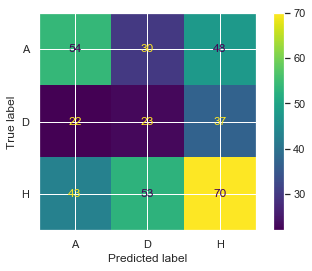

In [40]:
plot_confusion_matrix(model,X_test,y_test)

In [41]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.45      0.41      0.43       132
           D       0.22      0.28      0.24        82
           H       0.45      0.42      0.44       166

    accuracy                           0.39       380
   macro avg       0.37      0.37      0.37       380
weighted avg       0.40      0.39      0.39       380



In [42]:
model.feature_importances_

array([0.58736585, 0.41263415])

In [43]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
points_diff,0.587366
goals_diff,0.412634


In [44]:
from sklearn.tree import plot_tree

In [45]:
#plt.figure(figsize=(12,8))
#plot_tree(model);